In [ ]:
#gettin requisite libraries
!pip install sklearn
!pip install pandas
!pip install numpy

In [11]:
import numpy as np
import pandas as pd
#Importing diabetes toy dataset
from sklearn.datasets import load_diabetes
#Importing Boston house prices dataset


In [56]:

diabetes = load_boston()
x = diabetes.data
y = diabetes.target


In [57]:
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [58]:
x.shape

(506, 13)

In [59]:
# sigmoid function
def sigmoid(x: np.ndarray) -> np.ndarray:
    return 1/(1+np.exp(-x))

# derivative of sigmoid function
def sigmoid_derivative(x: np.ndarray) -> np.ndarray:
    return x * (1 - x)

# define layers
input_layer = x.shape[1]
hidden_layer = x.shape[1]-5
output_layer = x.shape[1]

# initialize weights
w1 = np.random.uniform(size=(input_layer, hidden_layer))
w2 = np.random.uniform(size=(hidden_layer, output_layer))

# learning rate
lr = 0.05
gradients=[]
errors=[]
# training
for i in range(4000):
    # forward propagation
    hidden_layer_activation = np.dot(x, w1)
    hidden_layer_output = sigmoid(hidden_layer_activation)
    output_layer_activation = np.dot(hidden_layer_output, w2)
    predicted_output = sigmoid(output_layer_activation)

    # backpropagation
    error = (x-predicted_output)
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = d_predicted_output.dot(w2.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # update weights
    w2 += hidden_layer_output.T.dot(d_predicted_output) * lr
    w1 += x.T.dot(d_hidden_layer) * lr
    errors.append(np.mean(np.abs(error)))
    gradients.append(np.mean(np.abs(d_predicted_output)))
    if i ==3999:
     #Save the hidden layer outputs with the target values
        hidden_layer_output = pd.DataFrame(hidden_layer_output)
        y = pd.DataFrame(y)
        hidden_layer_output = pd.concat([hidden_layer_output, y], axis=1)
        hidden_layer_output.to_csv('hidden_layer_output.csv')



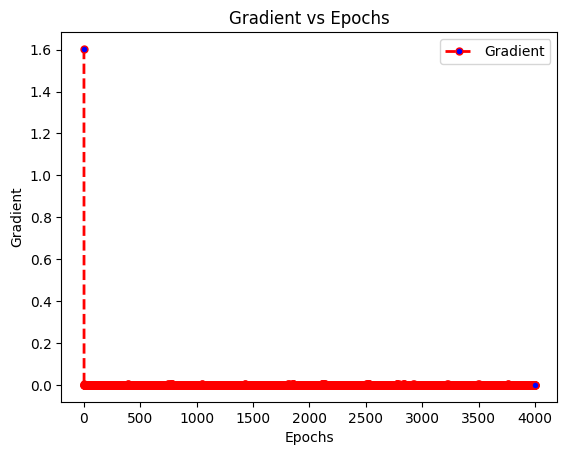

In [60]:
#Plotting gradient
import matplotlib.pyplot as plt
#Styling the plot

plt.plot(gradients, label='Gradient', color='red', linewidth=2, linestyle='dashed', marker='o', markerfacecolor='blue', markersize=5)
plt.xlabel('Epochs')
plt.ylabel('Gradient')
plt.title('Gradient vs Epochs')
plt.legend()
plt.show()


In [61]:
np.mean(abs(x-predicted_output))

69.4189282519147

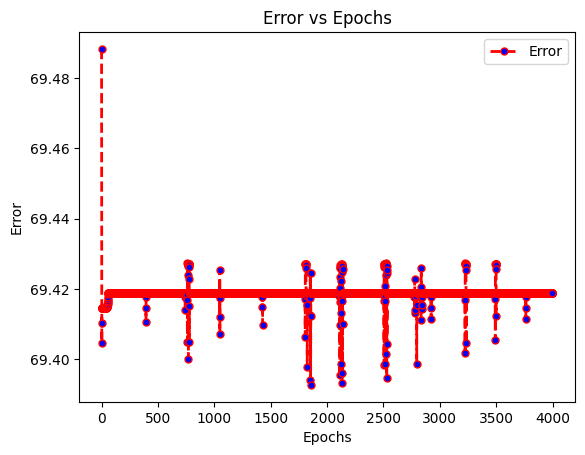

In [62]:
plt.plot(errors, label='Error', color='red', linewidth=2, linestyle='dashed', marker='o', markerfacecolor='blue', markersize=5)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs Epochs')
plt.legend()
plt.show()

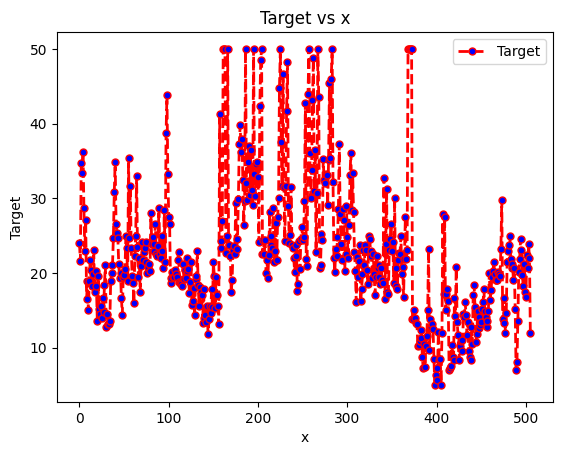

In [63]:
#Plotting target variable
plt.plot(y, label='Target', color='red', linewidth=2, linestyle='dashed', marker='o', markerfacecolor='blue', markersize=5)
plt.xlabel('x')
plt.ylabel('Target')
plt.title('Target vs x')
plt.legend()
plt.show()
